## **Task 2: Predict Future Stock Prices (Short-Term)**

[*********************100%***********************]  1 of 1 completed

📈 STOCK PRICE PREDICTION WITH MACHINE LEARNING

🔍 SECTION 1: DATA COLLECTION
----------------------------------------
📊 Selected Stock: AAPL
📅 Date Range: 2023-08-05 to 2025-08-04

🔄 Fetching stock data from Yahoo Finance...
✅ Successfully downloaded 499 days of data


🏢 Company: Apple Inc.

📏 Dataset Shape: (499, 5)
📋 Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

📄 First 5 rows:
Price            Close        High         Low        Open    Volume
Date                                                                
2023-08-07  177.077072  181.314643  175.591942  180.324556  97576100
2023-08-08  178.017639  178.482981  175.819645  177.908729  67823000
2023-08-09  176.423599  179.136428  175.255289  179.077025  60378500
2023-08-10  176.205780  178.958221  175.839453  177.700806  54686900
2023-08-11  176.265274  177.088158  175.035918  175.799319  52036700

📈 Last 5 rows:
Price            Close        High         Low        Open     Volume
Date                                                                 
2025-07-28  214.050003  214.850006  213.059998  214.029999   37858000
2025-07-29  211.270004  214.809998  210.820007  214.179993   51411700
2025-07-30  209.050003  212.389999  207.720001  211.899994   45512500
2025-07-31  207.570007  209.839

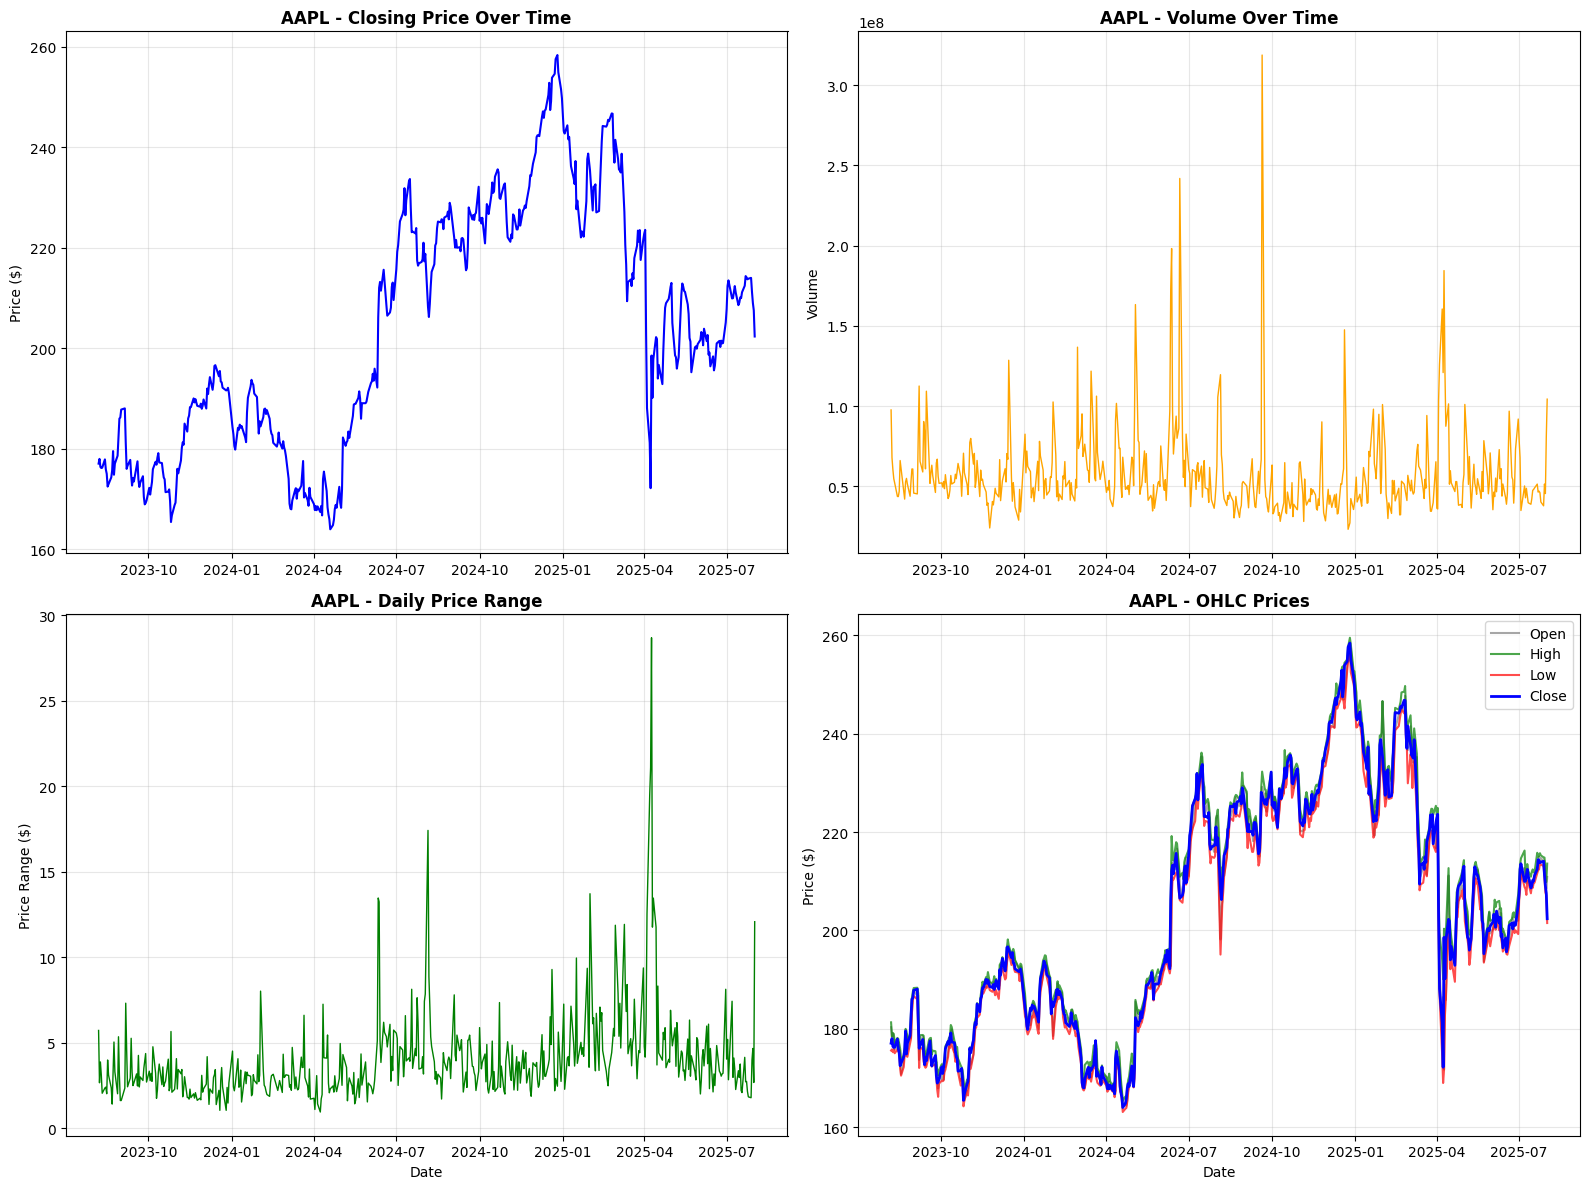


🛠️ SECTION 3: FEATURE ENGINEERING
----------------------------------------
🔧 Creating technical indicators and features...
✅ Created 15 new features

📋 Selected Features for Modeling:
    1. Open
    2. High
    3. Low
    4. Volume
    5. Price_Range
    6. Open_Close_Diff
    7. High_Close_Ratio
    8. Low_Close_Ratio
    9. MA_5
   10. MA_10
   11. MA_20
   12. Volatility_5
   13. Volatility_10
   14. Returns_1d
   15. Returns_5d
   16. Volume_Ratio
   17. RSI

🔄 SECTION 4: DATA PREPARATION FOR MODELING
---------------------------------------------
📊 Clean dataset shape: (479, 21)
🗑️ Removed 20 rows with missing values
📈 Final dataset for modeling: 478 samples, 17 features
🔧 Training set: 382 samples
🧪 Test set: 96 samples
✅ Features scaled using StandardScaler

🤖 SECTION 5: MODEL TRAINING AND EVALUATION
---------------------------------------------
🔄 Training models...

📊 Training Linear Regression...
   📈 R² Score: 0.6746
   📉 RMSE: $5.13
   📊 MAE: $3.09
   🎯 MAPE: 1.54%

📊 Train

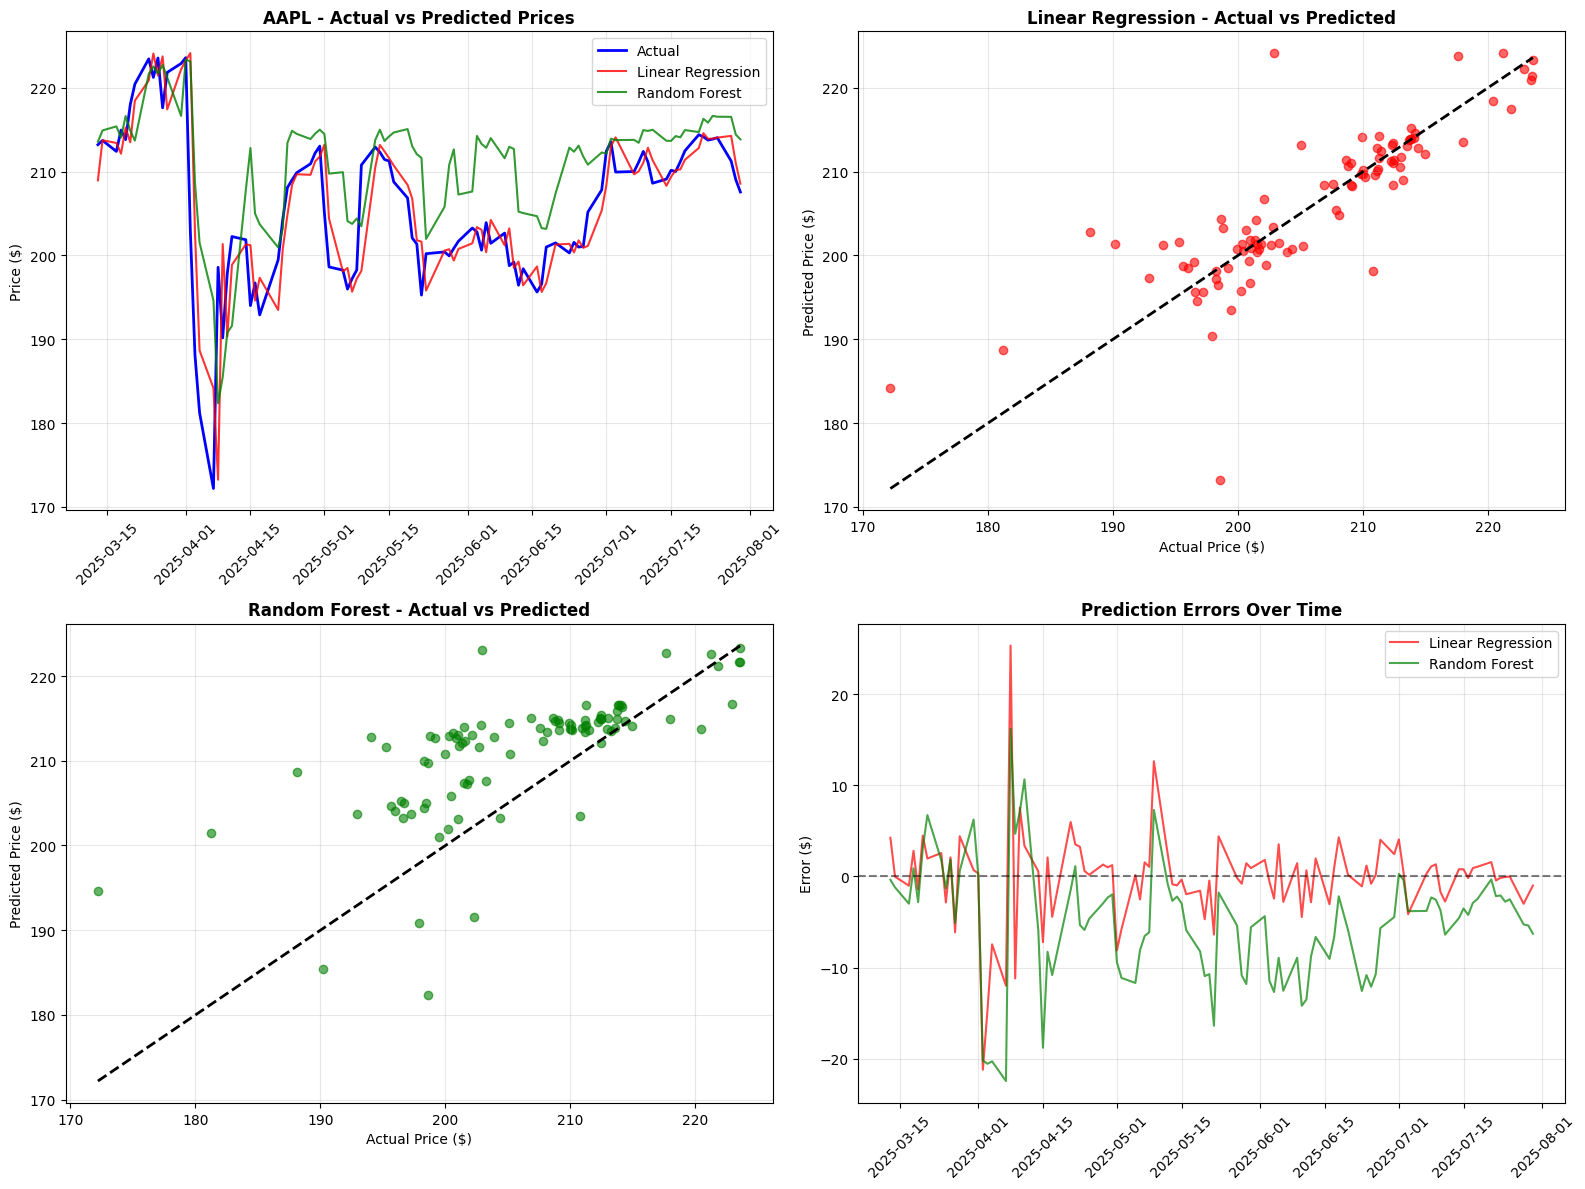


🔍 SECTION 7: FEATURE IMPORTANCE ANALYSIS
---------------------------------------------
📊 Top 10 Most Important Features (Random Forest):
             feature  importance
1               High    0.405487
8               MA_5    0.315962
0               Open    0.116408
2                Low    0.099441
9              MA_10    0.034676
10             MA_20    0.017952
3             Volume    0.001256
6   High_Close_Ratio    0.001173
5    Open_Close_Diff    0.001143
12     Volatility_10    0.001027


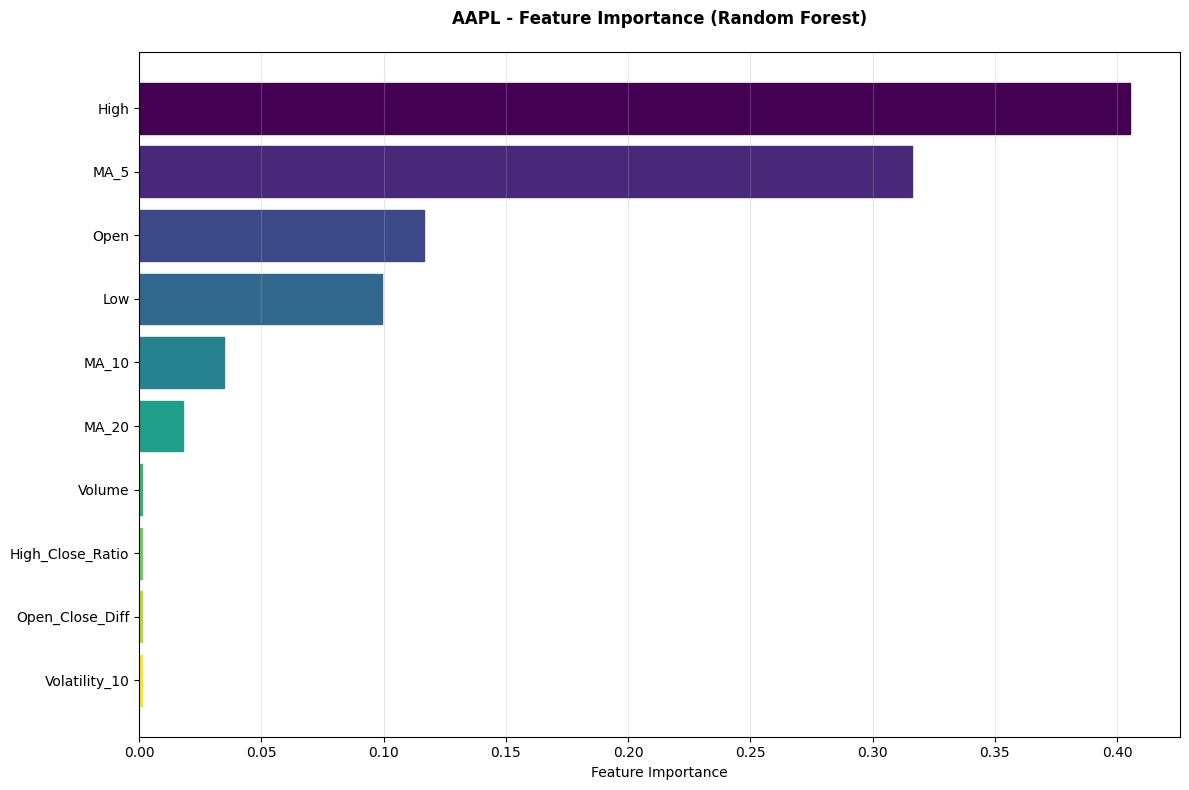


📈 SECTION 8: MODEL COMPARISON AND INSIGHTS
---------------------------------------------
📊 MODEL COMPARISON:
  Metric Linear Regression Random Forest
R² Score            0.6746        0.1385
RMSE ($)              5.13          8.34
 MAE ($)              3.09          6.59
MAPE (%)              1.54          3.29

🏆 Best Performing Model: Linear Regression
   📈 R² Score: 0.6746
   🎯 MAPE: 1.54%

🔮 SECTION 9: MAKING FUTURE PREDICTIONS
---------------------------------------------
📈 NEXT DAY PREDICTION (Linear Regression):
   💰 Current Price: $207.57
   🎯 Predicted Price: $207.69
   📊 Predicted Change: $+0.12 (+0.06%)
   🔄 Direction: 📈 UP

⚠️  DISCLAIMER:
   This is for educational purposes only. Stock prediction is inherently
   uncertain and this model should NOT be used for actual trading decisions.
   Always consult with financial professionals and do your own research.

✅ ANALYSIS COMPLETED!
🎯 Successfully trained and evaluated stock price prediction models for AAPL


In [2]:
# Task 2: Predict Future Stock Prices (Short-Term)
# A comprehensive guide for stock price prediction using machine learning

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("viridis")

print("📈 STOCK PRICE PREDICTION WITH MACHINE LEARNING")
print("=" * 55)

# SECTION 1: DATA COLLECTION

print("\n🔍 SECTION 1: DATA COLLECTION")
print("-" * 40)

# Stock selection - you can change this to any stock ticker
STOCK_TICKER = "AAPL"  # Apple Inc.
# Alternative options: "TSLA" (Tesla), "GOOGL" (Google), "MSFT" (Microsoft), "AMZN" (Amazon)

# Date range for historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)  # 2 years of data

print(f"📊 Selected Stock: {STOCK_TICKER}")
print(f"📅 Date Range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# Fetch stock data
print("\n🔄 Fetching stock data from Yahoo Finance...")
try:
    stock_data = yf.download(STOCK_TICKER, start=start_date, end=end_date)

    # Handle multi-level columns if present
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = stock_data.columns.get_level_values(0)

    print(f"✅ Successfully downloaded {len(stock_data)} days of data")

    # Get stock info
    stock_info = yf.Ticker(STOCK_TICKER).info
    company_name = stock_info.get('longName', STOCK_TICKER)
    print(f"🏢 Company: {company_name}")

except Exception as e:
    print(f"❌ Error fetching data: {e}")
    print("💡 Make sure you have internet connection and the ticker is valid")

# Display basic information about the dataset
print(f"\n📏 Dataset Shape: {stock_data.shape}")
print(f"📋 Columns: {list(stock_data.columns)}")
print(f"\n📄 First 5 rows:")
print(stock_data.head())

print(f"\n📈 Last 5 rows:")
print(stock_data.tail())

# SECTION 2: DATA EXPLORATION AND PREPARATION

print("\n🔍 SECTION 2: DATA EXPLORATION AND PREPARATION")
print("-" * 50)

# Basic statistics
print("📊 Basic Statistics:")
print(stock_data.describe())

# Check for missing values
print(f"\n❓ Missing Values:")
missing_values = stock_data.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# Plot historical stock prices
print("\n📈 Plotting historical stock prices...")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Closing price over time
axes[0, 0].plot(stock_data.index, stock_data['Close'], color='blue', linewidth=1.5)
axes[0, 0].set_title(f'{STOCK_TICKER} - Closing Price Over Time', fontweight='bold')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Volume over time
axes[0, 1].plot(stock_data.index, stock_data['Volume'], color='orange', linewidth=1)
axes[0, 1].set_title(f'{STOCK_TICKER} - Volume Over Time', fontweight='bold')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

# Price range (High-Low) over time
price_range = stock_data['High'] - stock_data['Low']
axes[1, 0].plot(stock_data.index, price_range, color='green', linewidth=1)
axes[1, 0].set_title(f'{STOCK_TICKER} - Daily Price Range', fontweight='bold')
axes[1, 0].set_ylabel('Price Range ($)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].grid(True, alpha=0.3)

# Candlestick-style plot (simplified)
axes[1, 1].plot(stock_data.index, stock_data['Open'], color='gray', alpha=0.7, label='Open')
axes[1, 1].plot(stock_data.index, stock_data['High'], color='green', alpha=0.7, label='High')
axes[1, 1].plot(stock_data.index, stock_data['Low'], color='red', alpha=0.7, label='Low')
axes[1, 1].plot(stock_data.index, stock_data['Close'], color='blue', linewidth=2, label='Close')
axes[1, 1].set_title(f'{STOCK_TICKER} - OHLC Prices', fontweight='bold')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_xlabel('Date')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SECTION 3: FEATURE ENGINEERING

print("\n🛠️ SECTION 3: FEATURE ENGINEERING")
print("-" * 40)

# Create a copy for feature engineering
df = stock_data.copy()

# Ensure we have the right column structure
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Reset index to make Date a column
df.reset_index(inplace=True)

print("🔧 Creating technical indicators and features...")

# 1. Basic price features
df['Price_Range'] = df['High'] - df['Low']
df['Open_Close_Diff'] = df['Close'] - df['Open']
df['High_Close_Ratio'] = df['High'] / df['Close']
df['Low_Close_Ratio'] = df['Low'] / df['Close']

# 2. Moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# 3. Volatility indicators
df['Volatility_5'] = df['Close'].rolling(window=5).std()
df['Volatility_10'] = df['Close'].rolling(window=10).std()

# 4. Price momentum
df['Returns_1d'] = df['Close'].pct_change(1)
df['Returns_5d'] = df['Close'].pct_change(5)

# 5. Volume indicators
df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
# Handle potential division issues
df['Volume_Ratio'] = df['Volume'].div(df['Volume_MA_5']).fillna(1)

# 6. Relative Strength Index (RSI) - simplified
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# 7. Target variable - Next day's closing price
df['Next_Close'] = df['Close'].shift(-1)

print(f"✅ Created {len([col for col in df.columns if col not in stock_data.columns]) - 1} new features")

# Select features for modeling
feature_columns = [
    'Open', 'High', 'Low', 'Volume',  # Original OHLV features
    'Price_Range', 'Open_Close_Diff', 'High_Close_Ratio', 'Low_Close_Ratio',  # Price features
    'MA_5', 'MA_10', 'MA_20',  # Moving averages
    'Volatility_5', 'Volatility_10',  # Volatility
    'Returns_1d', 'Returns_5d',  # Returns
    'Volume_Ratio', 'RSI'  # Volume and RSI
]

print(f"\n📋 Selected Features for Modeling:")
for i, feature in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {feature}")

# SECTION 4: DATA PREPARATION FOR MODELING

print("\n🔄 SECTION 4: DATA PREPARATION FOR MODELING")
print("-" * 45)

# Remove rows with NaN values (due to rolling calculations)
df_clean = df.dropna()
print(f"📊 Clean dataset shape: {df_clean.shape}")
print(f"🗑️ Removed {len(df) - len(df_clean)} rows with missing values")

# Prepare features and target
X = df_clean[feature_columns]
y = df_clean['Next_Close']

# Remove the last row (no target available)
X = X[:-1]
y = y[:-1]

print(f"📈 Final dataset for modeling: {X.shape[0]} samples, {X.shape[1]} features")

# Split data into train and test sets (80-20 split)
# For time series, we use the last 20% as test set
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"🔧 Training set: {X_train.shape[0]} samples")
print(f"🧪 Test set: {X_test.shape[0]} samples")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# SECTION 5: MODEL TRAINING AND EVALUATION

print("\n🤖 SECTION 5: MODEL TRAINING AND EVALUATION")
print("-" * 45)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

print("🔄 Training models...")

for name, model in models.items():
    print(f"\n📊 Training {name}...")

    # Train model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Random Forest doesn't need scaling
        y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calculate percentage accuracy
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results[name] = {
        'predictions': y_pred,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mape': mape
    }

    print(f"   📈 R² Score: {r2:.4f}")
    print(f"   📉 RMSE: ${rmse:.2f}")
    print(f"   📊 MAE: ${mae:.2f}")
    print(f"   🎯 MAPE: {mape:.2f}%")

# SECTION 6: RESULTS VISUALIZATION

print("\n📊 SECTION 6: RESULTS VISUALIZATION")
print("-" * 40)

# Create test dates for plotting
test_dates = df_clean.iloc[split_index:-1]['Date'].values

# Plot actual vs predicted prices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs Predicted for both models
axes[0, 0].plot(test_dates, y_test.values, label='Actual', color='blue', linewidth=2)
axes[0, 0].plot(test_dates, results['Linear Regression']['predictions'],
               label='Linear Regression', color='red', alpha=0.8)
axes[0, 0].plot(test_dates, results['Random Forest']['predictions'],
               label='Random Forest', color='green', alpha=0.8)
axes[0, 0].set_title(f'{STOCK_TICKER} - Actual vs Predicted Prices', fontweight='bold')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Scatter plot - Actual vs Predicted (Linear Regression)
axes[0, 1].scatter(y_test, results['Linear Regression']['predictions'], alpha=0.6, color='red')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 1].set_xlabel('Actual Price ($)')
axes[0, 1].set_ylabel('Predicted Price ($)')
axes[0, 1].set_title('Linear Regression - Actual vs Predicted', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Scatter plot - Actual vs Predicted (Random Forest)
axes[1, 0].scatter(y_test, results['Random Forest']['predictions'], alpha=0.6, color='green')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1, 0].set_xlabel('Actual Price ($)')
axes[1, 0].set_ylabel('Predicted Price ($)')
axes[1, 0].set_title('Random Forest - Actual vs Predicted', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Prediction errors over time
lr_errors = y_test.values - results['Linear Regression']['predictions']
rf_errors = y_test.values - results['Random Forest']['predictions']

axes[1, 1].plot(test_dates, lr_errors, label='Linear Regression', color='red', alpha=0.7)
axes[1, 1].plot(test_dates, rf_errors, label='Random Forest', color='green', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Prediction Errors Over Time', fontweight='bold')
axes[1, 1].set_ylabel('Error ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# SECTION 7: FEATURE IMPORTANCE ANALYSIS

print("\n🔍 SECTION 7: FEATURE IMPORTANCE ANALYSIS")
print("-" * 45)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': models['Random Forest'].feature_importances_
}).sort_values('importance', ascending=False)

print("📊 Top 10 Most Important Features (Random Forest):")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
bars = plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title(f'{STOCK_TICKER} - Feature Importance (Random Forest)', fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Color bars based on importance
colors = plt.cm.viridis(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# SECTION 8: MODEL COMPARISON AND INSIGHTS

print("\n📈 SECTION 8: MODEL COMPARISON AND INSIGHTS")
print("-" * 45)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE ($)', 'MAE ($)', 'MAPE (%)'],
    'Linear Regression': [
        f"{results['Linear Regression']['r2']:.4f}",
        f"{results['Linear Regression']['rmse']:.2f}",
        f"{results['Linear Regression']['mae']:.2f}",
        f"{results['Linear Regression']['mape']:.2f}"
    ],
    'Random Forest': [
        f"{results['Random Forest']['r2']:.4f}",
        f"{results['Random Forest']['rmse']:.2f}",
        f"{results['Random Forest']['mae']:.2f}",
        f"{results['Random Forest']['mape']:.2f}"
    ]
})

print("📊 MODEL COMPARISON:")
print(comparison_df.to_string(index=False))

# Determine best model
best_model = 'Linear Regression' if results['Linear Regression']['r2'] > results['Random Forest']['r2'] else 'Random Forest'
print(f"\n🏆 Best Performing Model: {best_model}")
print(f"   📈 R² Score: {results[best_model]['r2']:.4f}")
print(f"   🎯 MAPE: {results[best_model]['mape']:.2f}%")

# SECTION 9: MAKING FUTURE PREDICTIONS

print("\n🔮 SECTION 9: MAKING FUTURE PREDICTIONS")
print("-" * 45)

# Get the most recent data point for prediction
latest_data = df_clean.iloc[-1:][feature_columns]

# Make prediction for next day
if best_model == 'Linear Regression':
    latest_scaled = scaler.transform(latest_data)
    next_day_prediction = models[best_model].predict(latest_scaled)[0]
else:
    next_day_prediction = models[best_model].predict(latest_data)[0]

current_price = df_clean.iloc[-1]['Close']
predicted_change = next_day_prediction - current_price
predicted_change_pct = (predicted_change / current_price) * 100

print(f"📈 NEXT DAY PREDICTION ({best_model}):")
print(f"   💰 Current Price: ${current_price:.2f}")
print(f"   🎯 Predicted Price: ${next_day_prediction:.2f}")
print(f"   📊 Predicted Change: ${predicted_change:+.2f} ({predicted_change_pct:+.2f}%)")

direction = "📈 UP" if predicted_change > 0 else "📉 DOWN"
print(f"   🔄 Direction: {direction}")

print(f"\n⚠️  DISCLAIMER:")
print(f"   This is for educational purposes only. Stock prediction is inherently")
print(f"   uncertain and this model should NOT be used for actual trading decisions.")
print(f"   Always consult with financial professionals and do your own research.")

print(f"\n✅ ANALYSIS COMPLETED!")
print(f"🎯 Successfully trained and evaluated stock price prediction models for {STOCK_TICKER}")